In [13]:
import sys
sys.path.append('../..')

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Individual

In [14]:
grid = 5
sub_grid = 5

folder = f'/storage/arnaud/real_data_test_small_plume_results/threshold_tests-{grid}_{grid}-{sub_grid}_{sub_grid}/'

In [15]:
files = os.listdir(folder)
files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

# Gather thresholds
theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
theshold_scales.sort()

# Gather environment ids
environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
environment_ids.sort()

# Building results dataframe
rows = []
for thresh_scale in theshold_scales:
    for env_i in environment_ids:
        df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

        rows.append({
            'threshold': thresh_scale,
            'environment': env_i,
            'convergence': df['converged']['mean'],
            'convergence_std': df['converged']['standard_deviation'],
            't_min_over_t': df['steps_taken']['success_mean'],
            't_min_over_t_std': df['steps_taken']['success_standard_deviation']
        })
results_df = pd.DataFrame(rows)

In [16]:
results_df

,threshold,environment,convergence,convergence_std,t_min_over_t,t_min_over_t_std
0,1,0,0.0008445945945945946,0.0290496343275673,1126.000000,73.259812
1,1,1,0.0,0.0,NaN,NaN
2,1,2,0.21255630630630631,0.4091162707051945,1073.588079,88.193548
3,1,3,0.07066441441441441,0.25626344832980436,1052.278884,104.371385
4,1,4,0.11176801801801801,0.31508082798917175,1071.105793,96.848491
...,...,...,...,...,...,...
91,8,7,0.0008445945945945946,0.0290496343275673,1000.000000,105.910339
92,8,8,0.0,0.0,NaN,NaN
93,8,9,0.004786036036036036,0.0690154322966813,1067.764706,59.124370
94,8,10,0.0045045045045045045,0.06696427363656984,582.875000,76.291437


## For all

In [17]:
def get_results(grid, subgrid) -> pd.DataFrame:
    folder = f'/storage/arnaud/real_data_test_small_plume_results/threshold_tests-{grid}_{grid}-{subgrid}_{subgrid}/'

    # Gather files
    files = os.listdir(folder)
    files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

    # Gather thresholds
    theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
    theshold_scales.sort()

    # Gather environment ids
    environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
    environment_ids.sort()

    # Building results dataframe
    rows = []
    for thresh_scale in theshold_scales:
        for env_i in environment_ids:
            df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

            rows.append({
                'threshold': thresh_scale,
                'environment': env_i,
                'convergence': df['converged']['mean'],
                'convergence_std': df['converged']['standard_deviation'],
                't_min_over_t': df['steps_taken']['success_mean'],
                't_min_over_t_std': df['steps_taken']['success_standard_deviation']
            })
    results_df = pd.DataFrame(rows)

    return results_df

In [18]:
all_test_grids = np.array([
    [5,5],
    [5,7],
    [7,5],
    [7,7],
    [9,5],
    [9,7]
])

all_result_dfs = [get_results(grid, subgrid) for grid, subgrid in all_test_grids]

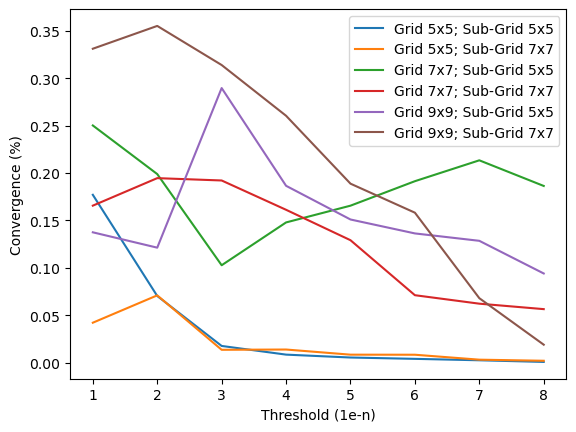

In [19]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

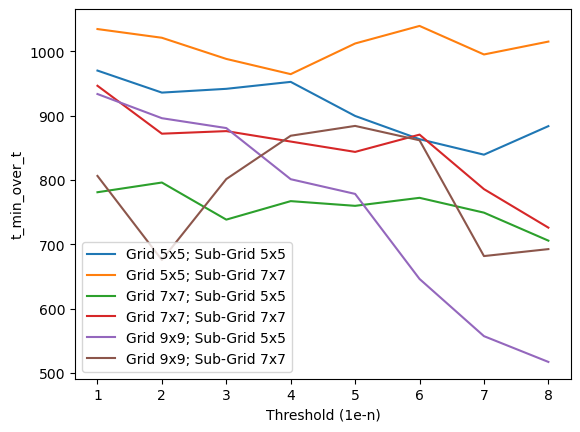

In [20]:
metric_label = 't_min_over_t'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label}')
plt.legend()
plt.show()

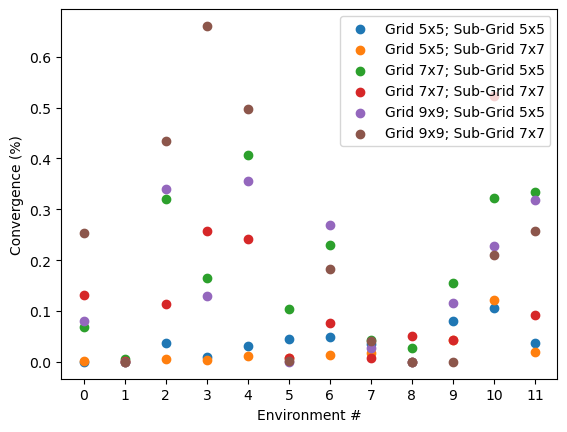

In [21]:
metric_label = 'Convergence'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

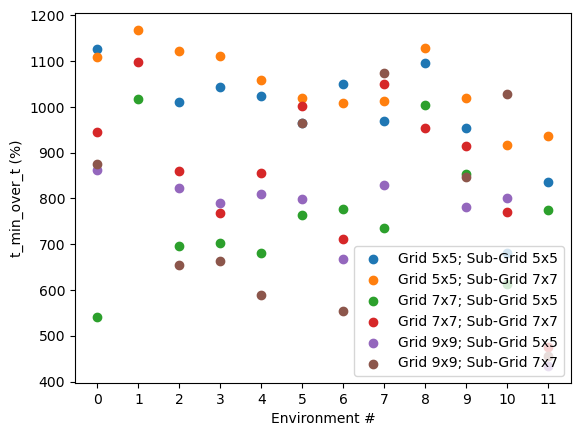

In [22]:
metric_label = 't_min_over_t'
for (grid, subgrid), res_df in zip(all_test_grids, all_result_dfs):
    metric = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('environment')[metric_label.lower()].std())
    plt.scatter(environment_ids,
                 metric,
                #  yerr=metric_std,
                 label=f'Grid {grid}x{grid}; Sub-Grid {subgrid}x{subgrid}')

plt.xlabel('Environment #')
plt.xticks(np.arange(len(environment_ids)))
plt.ylabel(f'{metric_label} (%)')
plt.legend()
plt.show()

## Comparing with other covariances

In [25]:
cov_folder = '/storage/arnaud/real_data_test_covariance'
files = [file for file in os.listdir(cov_folder) if file.startswith('thresh')]

In [28]:
covariances = [int(file.split('-')[-1].split('_')[1]) for file in files]
covariances = sorted(covariances)

In [30]:
def get_results_cov(cov) -> pd.DataFrame:
    folder = f'/storage/arnaud/real_data_test_covariance/threshold_tests-9_9-7_7-cov_{cov}/'

    # Gather files
    files = os.listdir(folder)
    files = [file for file in files if file.endswith('-analysis.csv')] # Filter files

    # Gather thresholds
    theshold_scales = np.unique(np.array([int(file.split('-')[0][-1]) for file in files]))
    theshold_scales.sort()

    # Gather environment ids
    environment_ids = np.unique(np.array([int(file.split('-')[1].split('_')[1]) for file in files]))
    environment_ids.sort()

    # Building results dataframe
    rows = []
    for thresh_scale in theshold_scales:
        for env_i in environment_ids:
            df = pd.read_csv(folder + f't_e{thresh_scale}-env_{env_i}-analysis.csv', index_col=0)

            rows.append({
                'threshold': thresh_scale,
                'environment': env_i,
                'convergence': df['converged']['mean'],
                'convergence_std': df['converged']['standard_deviation'],
                't_min_over_t': df['steps_taken']['success_mean'],
                't_min_over_t_std': df['steps_taken']['success_standard_deviation']
            })
    results_df = pd.DataFrame(rows)

    return results_df

In [31]:
all_cov_result_dfs = [get_results_cov(cov) for cov in covariances]

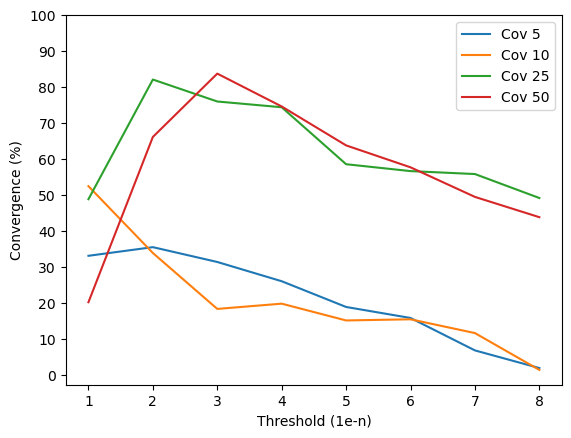

In [36]:
metric_label = 'Convergence'
for cov, res_df in zip(covariances, all_cov_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Cov {cov}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'{metric_label} (%)')
plt.yticks(np.arange(11)/10, np.arange(11)*10)
plt.legend()
plt.show()

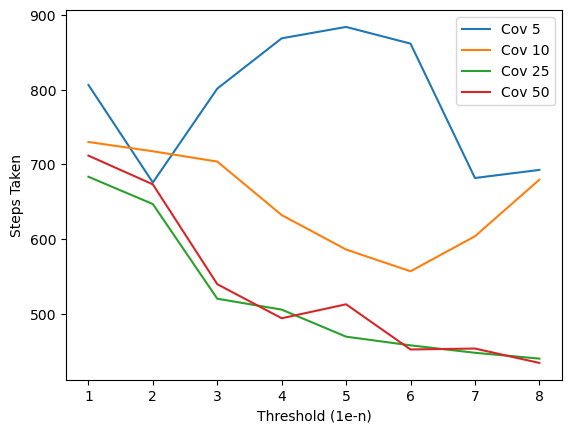

In [35]:
metric_label = 't_min_over_t'
for cov, res_df in zip(covariances, all_cov_result_dfs):
    metric = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].mean())
    metric_std = np.array(res_df.astype(float).groupby('threshold')[metric_label.lower()].std())
    plt.errorbar(theshold_scales,
                 metric,
                #  yerr=metric_std,
                 label=f'Cov {cov}')

plt.xlabel('Threshold (1e-n)')
plt.ylabel(f'Steps Taken')
plt.legend()
plt.show()